In [1]:
from scipy.sparse import csr_matrix
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

from quantumScarsCheck import *
from quantumScarsPlotting import *
from quantumScarFunctions import *

c:\Users\idden\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\idden\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


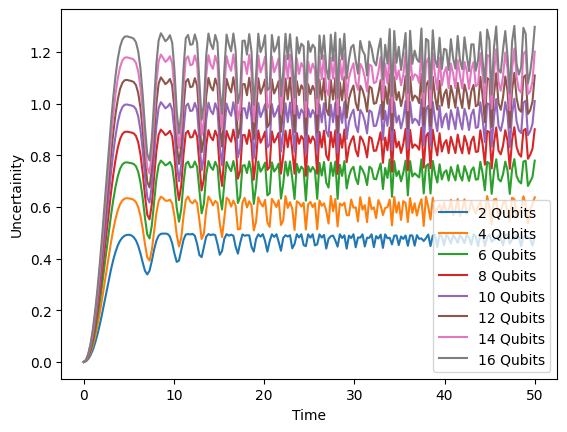

In [6]:
nlist = list(range(2, 18, 2))
tlist = np.linspace(0, 50, 200)
for N in nlist:
    H0, H1, eigenvalues, eigenstates, psi0 = get_scar_ham(N)

    args = {"A": 0.1} #, "omega": 0.642570281124498
    H = qt.QobjEvo([H0, [H1, const]], args=args)
    psi_t = qt.sesolve(H, eigenstates[0], tlist)

    tempUncertainty = []
    for states in psi_t.states:
        uncertainty = np.sqrt((states.dag() * H0**2 * states) - (states.dag() * H0 * states)**2)
        tempUncertainty.append(uncertainty)
    plt.plot(tlist, tempUncertainty, label=f"{N} Qubits")

plt.xlabel("Time")
plt.ylabel("Uncertainity")
plt.legend()
plt.show()

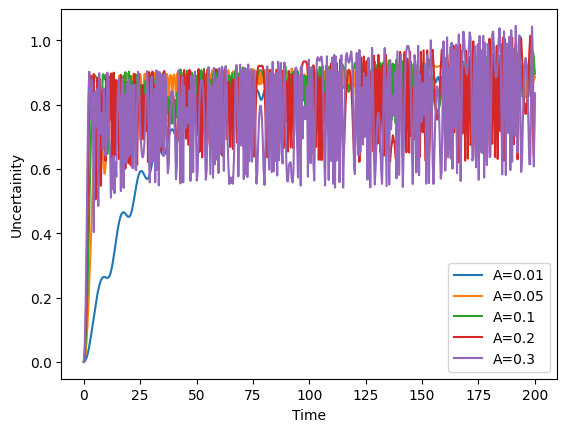

In [8]:
alist = [0.01, 0.05, 0.1, 0.2, 0.3]
tlist = np.linspace(0, 200, 500)
H0, H1, eigenvalues, eigenstates, psi0 = get_scar_ham(8)
for amp in alist:
    args = {"A": amp} #, "omega": 0.642570281124498
    H = qt.QobjEvo([H0, [H1, const]], args=args)
    psi_t = qt.sesolve(H, eigenstates[0], tlist)

    tempUncertainty = []
    for states in psi_t.states:
        uncertainty = np.sqrt((states.dag() * H0**2 * states) - (states.dag() * H0 * states)**2)
        tempUncertainty.append(uncertainty)
    plt.plot(tlist, tempUncertainty, label=f"A={amp}")

plt.xlabel("Time")
plt.ylabel("Uncertainity")
plt.legend()
plt.show()